In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df_delhi = pd.read_csv("/Users/adlnzmnzr/Desktop/delhivery.csv")

In [4]:
df_delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
df_delhi.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [6]:
df_delhi['trip_creation_time'] = pd.to_datetime(df_delhi['trip_creation_time'], errors = 'coerce')
df_delhi['cutoff_timestamp'] = pd.to_datetime(df_delhi['cutoff_timestamp'], errors = 'coerce')
df_delhi['od_start_time'] = pd.to_datetime(df_delhi['od_start_time'], errors = 'coerce')
df_delhi['od_end_time'] = pd.to_datetime(df_delhi['od_end_time'], errors = 'coerce')


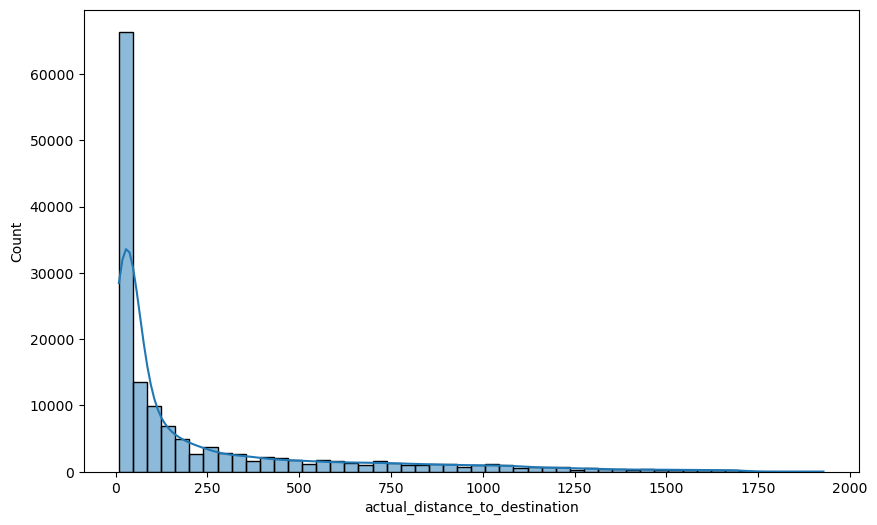

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df_delhi['actual_distance_to_destination'], bins=50, kde=True)
plt.show()

In [8]:
columns_to_winsorize = [
    'start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination',
    'actual_time', 'osrm_time', 'osrm_distance', 'factor',
    'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'
]

def winsorize_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

for col in columns_to_winsorize:
    df_delhi[col] = winsorize_iqr(df_delhi[col])

# Show summary
print(df_delhi[columns_to_winsorize].describe())


       start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               960.113480     190.291854                      191.212020   
std               1033.476864     235.505504                      235.284651   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               3843.500000     682.000000                      681.738375   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      344.454120     174.408830     230.380690       1.952507   
std       407.293133     206.001719     280.609231       0.539993   
min

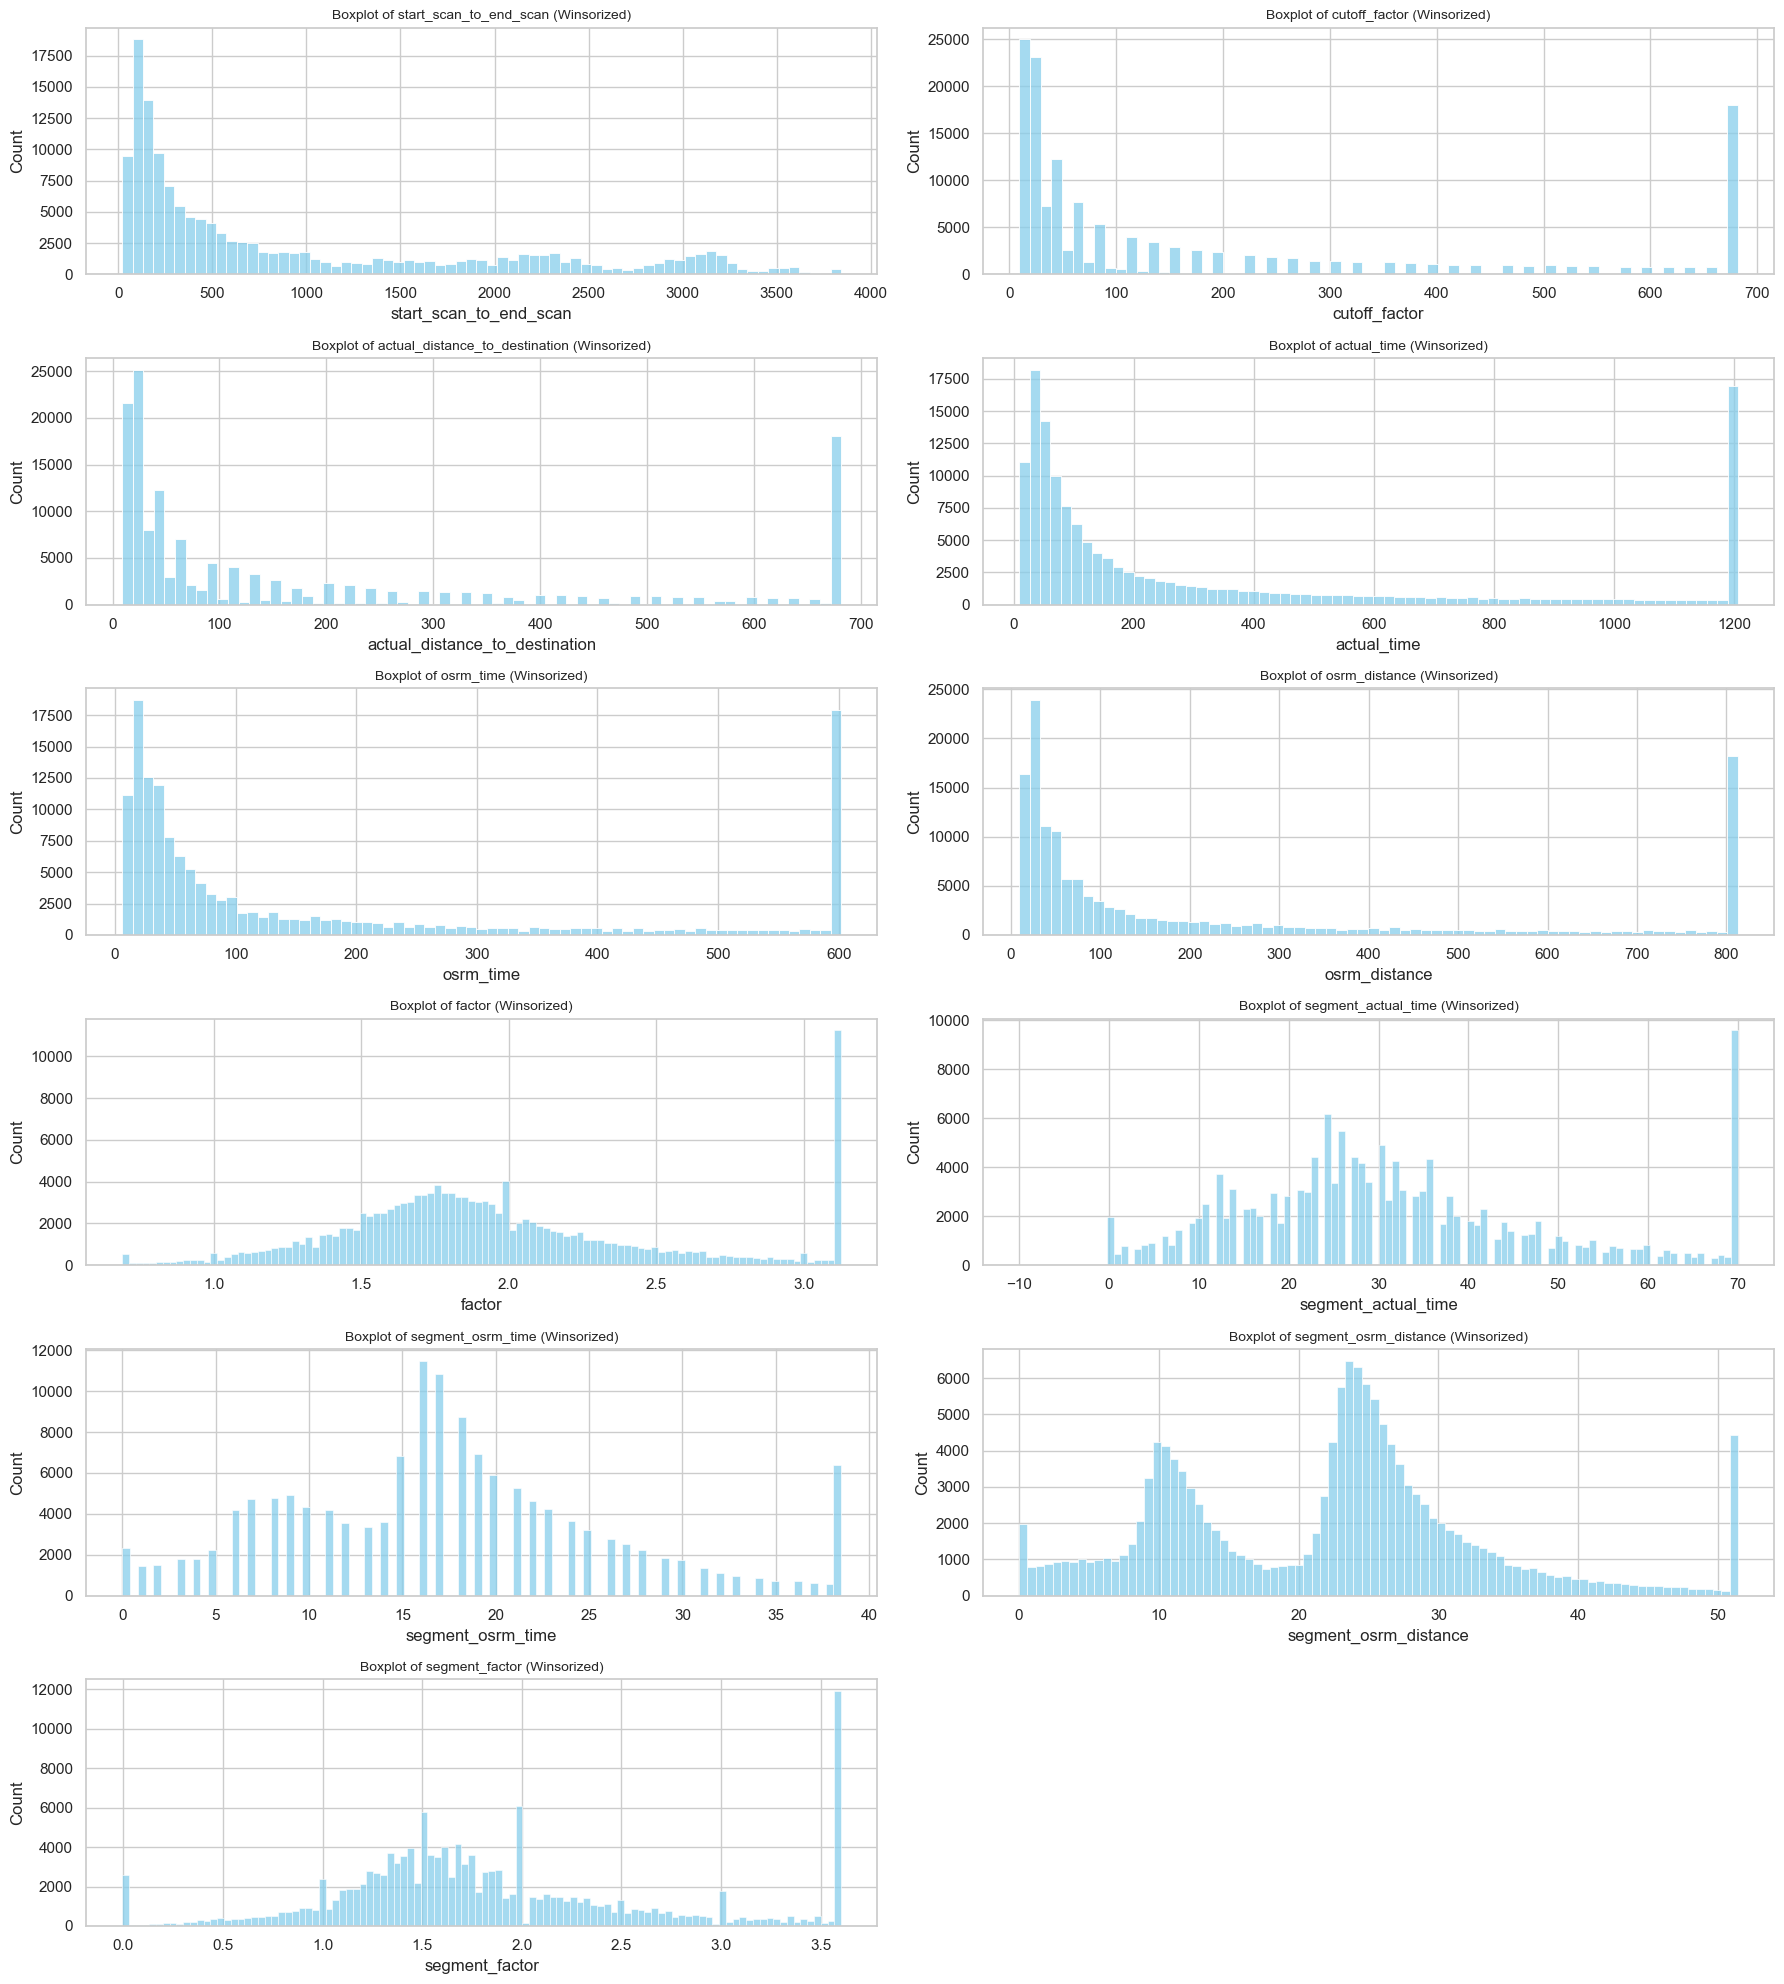

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 20))

for i, col in enumerate(columns_to_winsorize, 1):
    plt.subplot(6, 2, i)
    sns.histplot(x=df_delhi[col], color='skyblue')
    plt.title(f'Boxplot of {col} (Winsorized)', fontsize=10)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

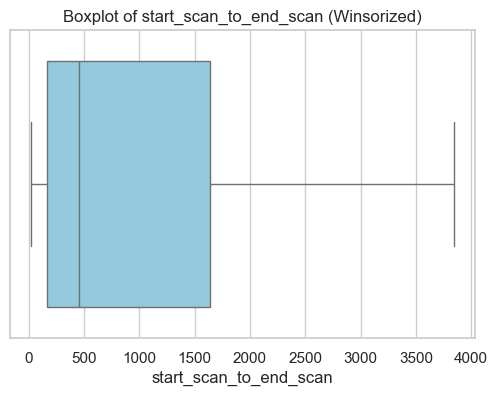

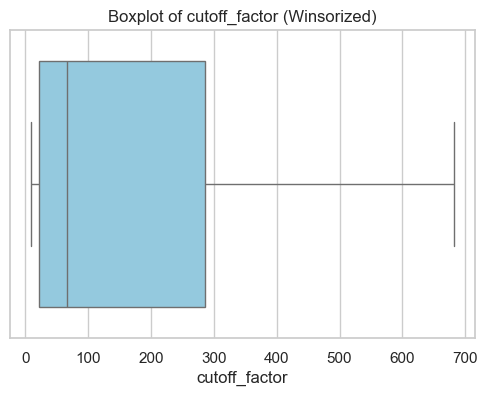

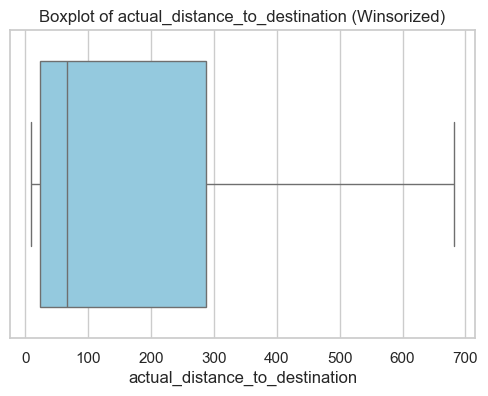

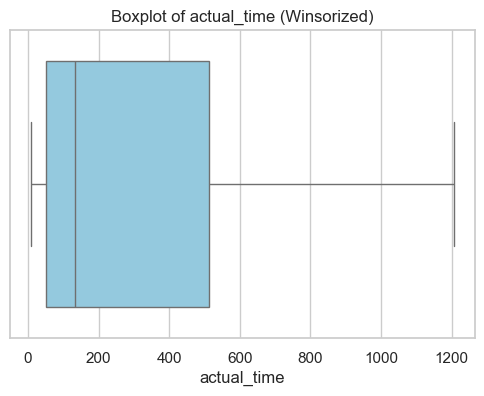

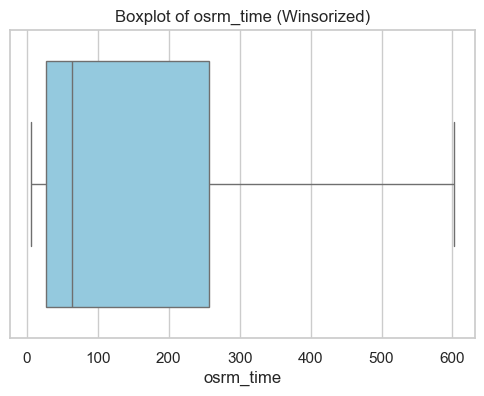

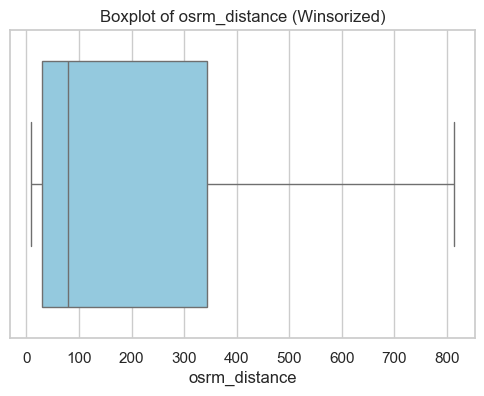

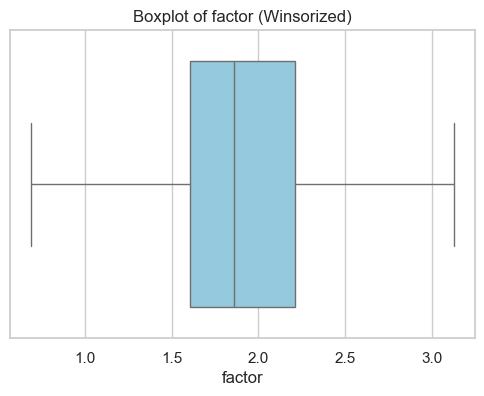

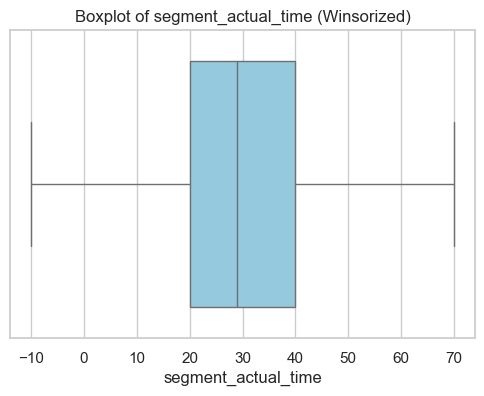

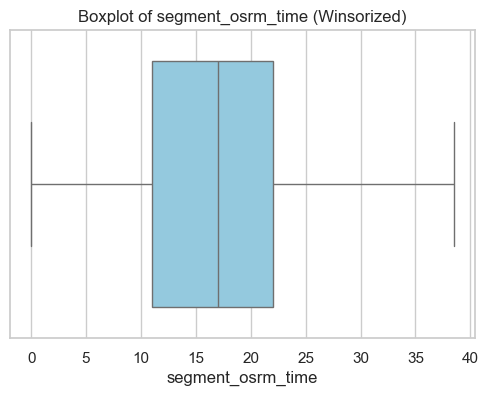

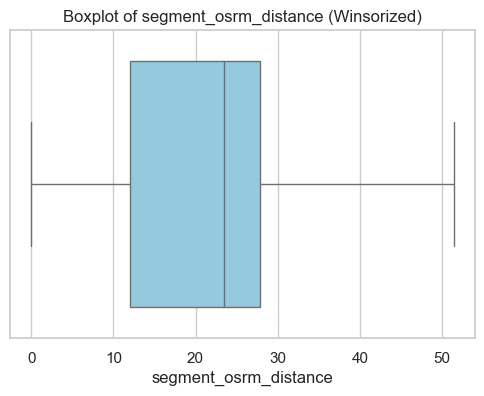

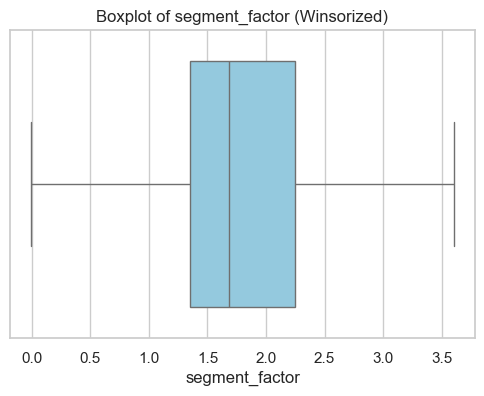

In [16]:
for col in columns_to_winsorize:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_delhi[col], color='skyblue')
    plt.title(f'Boxplot of {col} (Winsorized)')
    plt.xlabel(col)
    plot_path = f"boxplot_{col}.png"
    plt.savefig(plot_path)
    plt.show()
    plt.close()

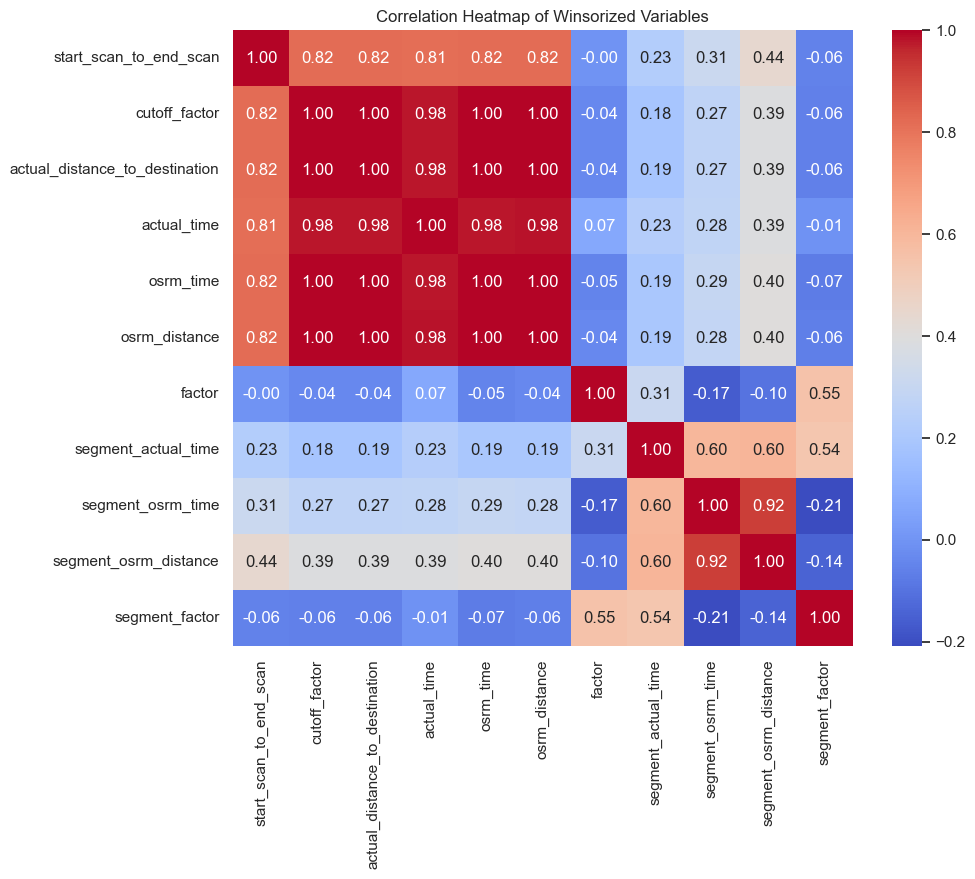

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df_delhi[columns_to_winsorize].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Winsorized Variables")
heatmap_path = "correlation_heatmap.png"
plt.savefig(heatmap_path)
plt.show()
plt.close()

In [18]:
df_delhi["speed_osrm"] = df_delhi["osrm_distance"] / (df_delhi["osrm_time"] + 1e-5)
df_delhi["speed_segment_osrm"] = df_delhi["segment_osrm_distance"] / (df_delhi["segment_osrm_time"] + 1e-5)
df_delhi["distance_ratio"] = df_delhi["segment_osrm_distance"] / (df_delhi["osrm_distance"] + 1e-5)
df_delhi["time_ratio"] = df_delhi["segment_osrm_time"] / (df_delhi["osrm_time"] + 1e-5)
df_delhi["distance_time_product"] = df_delhi["osrm_distance"] * df_delhi["osrm_time"]

feature_columns = [
    'osrm_time', 'osrm_distance', 'factor', 'segment_osrm_time',
    'segment_osrm_distance', 'segment_factor', 'speed_osrm',
    'speed_segment_osrm', 'distance_ratio', 'time_ratio', 'distance_time_product'
]
target_column = 'actual_time'


In [21]:
df_model = df_delhi[feature_columns + [target_column]].dropna()
X = df_model[feature_columns]
y = df_model[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=30, max_depth=8, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 13.65
RMSE: 37.90
R2 Score: 0.99


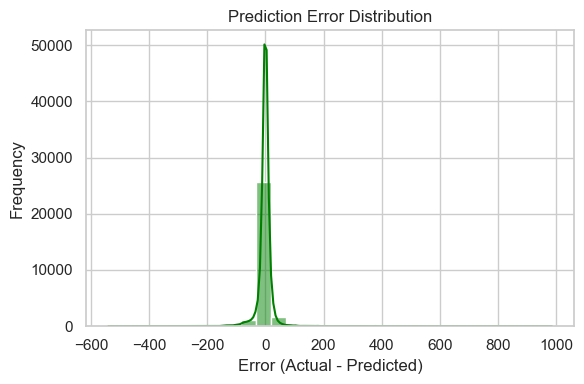

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(y_test - y_pred, bins=30, kde=True, color='green')
plt.title('Prediction Error Distribution')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

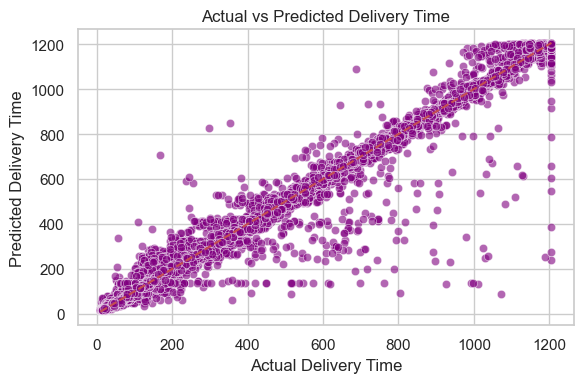

In [24]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time')
plt.tight_layout()
plt.show()